# Communicate-Data-Findings-Ford-GoBike-System
## by Mohamed Abdelkader

## Investigation Overview

> Explore data and Understand how it correlate each other and bring best out of it ..

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area..
>  Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. 
It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. <br>
> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('201902-fordgobike-tripdata.csv')

## (Visualization 1)

> most of bike users are around 30 and the more old age the less users .. <br>
> most users below 40 years, few users between 40 and 60, and very few users above 60.


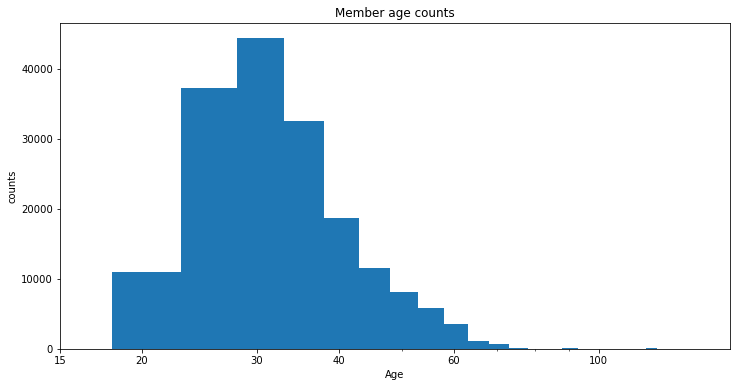

In [3]:
# Adding bins as in Univariant lesson class no 13 Scales and Transformations
# Adding ticks 
df['Age'] = 2019 - df.member_birth_year
bin_size = 5
bins = np.arange(df.Age.min(),df.Age.max() + bin_size, bin_size)
ticks = [15,20,30,40,60,100]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = bins);
plt.title('Member age counts');
plt.xscale('log');
# as we see it became more normalized
plt.xticks(ticks, labels);
# now figure became much better visualizing 
plt.xlabel('Age');
plt.ylabel('counts');

## (Visualization 2)

> it's max used in Thursday and least at weekend (SAT AND SUN).<br>
> it's peak of using is at the early morning at 8 am where people foing to schools and work etc.. and at 5 pm while returing homes ..<br>
> And ofc rarely used at night and early morning and average using is in day time between 8 am and 5 pm.

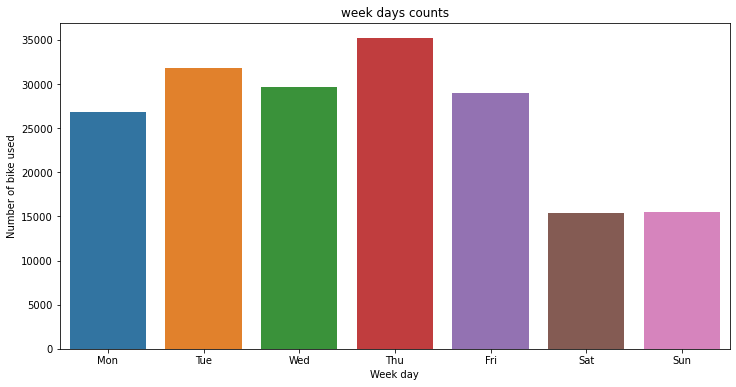

In [4]:
# seaborn.countplot Show the counts of observations in each categorical bin using bars
# Change data type start_time end_time from object to datetime.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# change duration_sec to duration in minutes to be like daily used data by people
df['duration_sec'] = df['duration_sec']/60
df.rename(columns= {"duration_sec":"duration_min"}, inplace = True ) 
df['start_month']=df['start_time'].dt.strftime('%B')
df['start_Weak_day']=df['start_time'].dt.strftime('%a')
df['start_hour']=df['start_time'].dt.hour
df['day_of_month']=df['start_time'].dt.strftime('%d')
daysofweak=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(12,6))
sb.countplot(data=df, x='start_Weak_day',order=daysofweak);
plt.xlabel('Week day');
plt.ylabel('Number of bike used');
plt.title('week days counts');

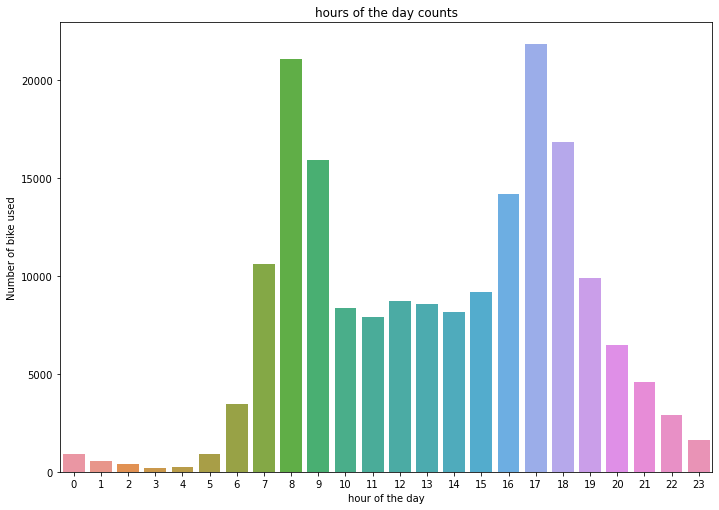

In [5]:
plt.figure(figsize=[ 11.69, 8.27])
sb.countplot(data=df, x='start_hour');
plt.xlabel('hour of the day');
plt.ylabel('Number of bike used');
plt.title('hours of the day counts');

## (Visualization 3)

> as we see males have lower average durtion and women have higher average duration of trips.<br>

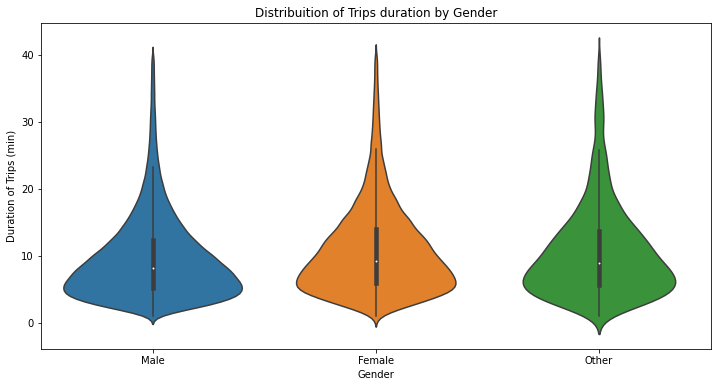

In [6]:
# create new df with duration max 40 mins as I tried many times and found that 40 mins is GREAT to show differences 
duration_min_lessthan_hour=  df[df.duration_min <= 40]
plt.figure(figsize=(12,6))
sb.violinplot(data = duration_min_lessthan_hour, x = 'member_gender', y = 'duration_min');
plt.title("Distribuition of Trips duration by Gender")
plt.xlabel('Gender');
plt.ylabel('Duration of Trips (min)');

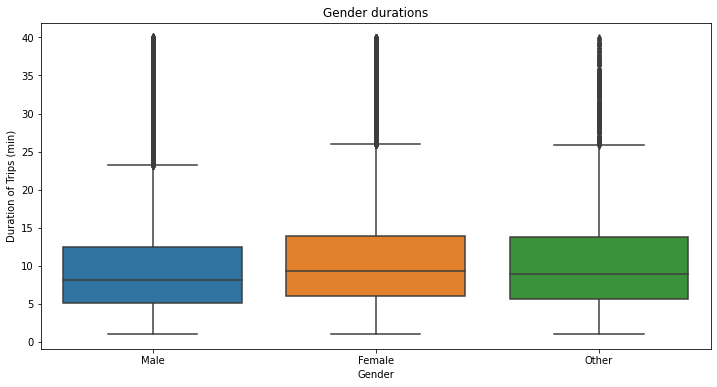

In [7]:
plt.figure(figsize=(12,6))
sb.boxplot(data = duration_min_lessthan_hour, x = 'member_gender', y = 'duration_min');
plt.title('Gender durations');
plt.xlabel('Gender')
plt.ylabel('Duration of Trips (min)');

# (Visualization 4)
> we see that start station and end station IDs are highly correlated then maybe we can search about relation between them .<br>
> most users of first 150 stations users ending at the same 150 stations.<br>
> while stations starting from ID 150 to 270 ending at the same period of stations.<br>
> we can say that that these groups of stations are in cities and have long high way between them .. <br>

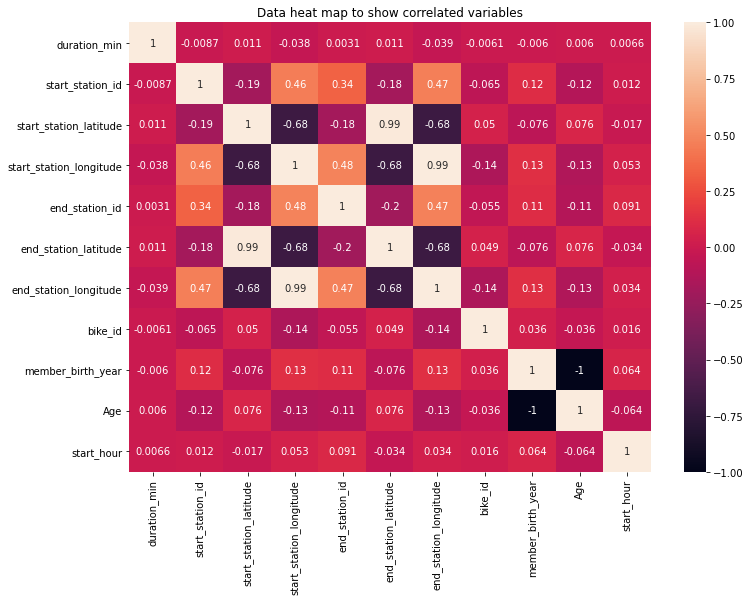

In [8]:
# while searching for new features which related or linked (correlated) we can make a heat map to dataframe.
# first we should make dataframe.corr() where is used to find the pairwise correlation of all columns in the dataframe.
# also df.corr() returns the 2D array required by heatmap and we add annot = True to show correlation values on every cell.
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(df.corr(),  annot = True)
plt.title('Data heat map to show correlated variables');

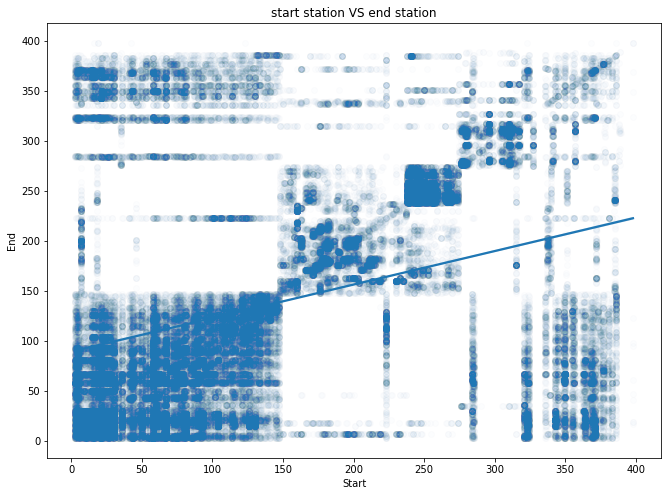

In [9]:
# after adding Jitter and transparenc as required
plt.figure(figsize=[ 11, 8])

sb.regplot(data = duration_min_lessthan_hour, x = 'start_station_id', y = 'end_station_id', x_jitter =0.2, scatter_kws = {'alpha' : 1/90});
plt.title("start station VS end station")
plt.xlabel('Start');
plt.ylabel('End');

# (Visualization 5)
> so most of users are subscriber and not custmers and this means people are more satisfied with the price of subscribing and long term use instead of just one time , so I think company should make some discounts about 1 time use this can attract more subscribers also .<br>
> About 10 % of users are members who are enrolled in the Bike Share for All program .
means also about 10 % are low income residents .

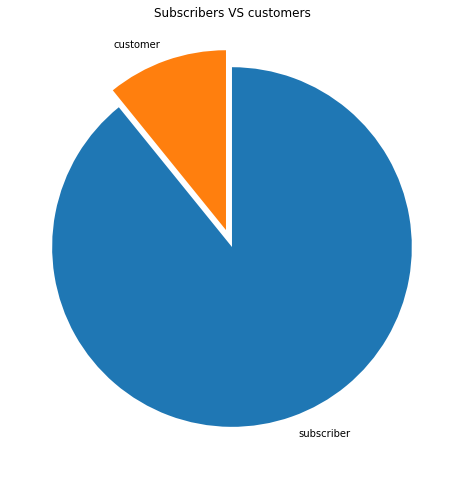

In [10]:
plt.figure(figsize=[ 11.69, 8.27])

plt.pie(df['user_type'].value_counts(), labels = ['subscriber','customer'],
        explode =(0 , 0.1)  , startangle = 90, counterclock = False );
plt.title('Subscribers VS customers');

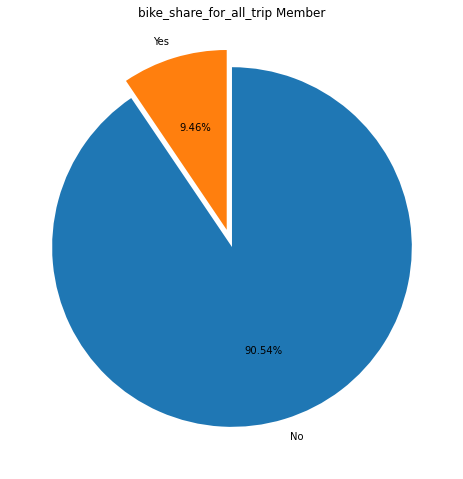

In [11]:
plt.figure(figsize=[ 11.69, 8.27])

plt.pie(df['bike_share_for_all_trip'].value_counts(), labels = ['No','Yes'],
        explode =(0 , 0.1)  , startangle = 90, counterclock = False, autopct='%1.2f%%' );
plt.title('bike_share_for_all_trip Member');

# (Visualization 5)
> as we see most of repeated durations are in range of 6 to 18 mins<br>
> It shows that More than 90% bike trips were held with an average trip duration of 22 minutes <br>
> as we see durations of Customers always higher.. and Male Less duration than Females and OTHER always have the most durations.

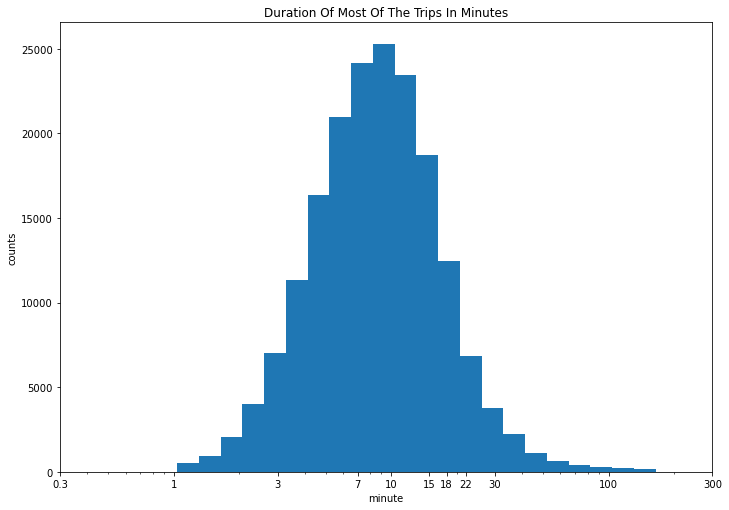

In [12]:
# here we will repeat as in Age but the max value we will choose the mean value 2.140659 as here high values so
# counts which can be ignored to make plot more displayful 
# Adding bins from min to 50% of log duration_min with step 0.1 and making 10 ** before np.arrange to add normal bins instead of logistic bins .
plt.figure(figsize=[ 11.69, 8.27])

bins = 10 ** np.arange(0.016,2.14+0.1,0.1)
ticks = [0.3,1,3,7,10,15,18,22,30,100,300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlabel('minute');
plt.ylabel('counts');
plt.title('Duration Of Most Of The Trips In Minutes');

<Figure size 841.68x595.44 with 0 Axes>

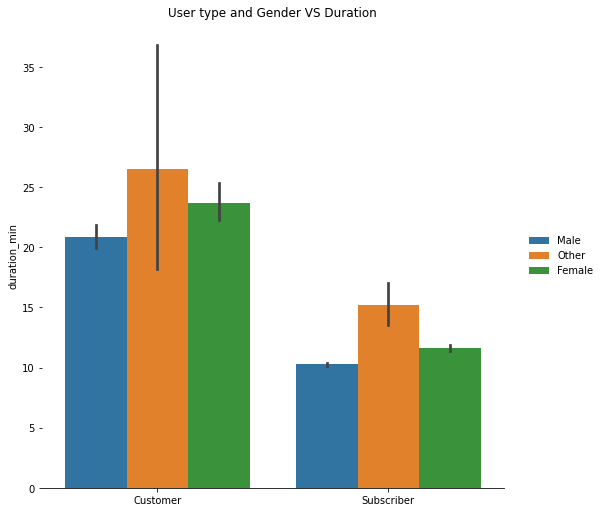

In [13]:
# from https://seaborn.pydata.org/examples/index.html we can choose favorites plots 
# hue is the third input ,
plt.figure(figsize=[ 11.69, 8.27])

g = sb.catplot(
    data=df, kind="bar",
    x="user_type", y="duration_min", hue="member_gender",
     height=7
);
g.despine(left=True);
g.set_axis_labels("", "duration_min");
g.legend.set_title("");
plt.title('User type and Gender VS Duration');

## Summary of Findings

- most of bike users are around 30 and the more old age the less users ..
- t's max used in Thursday and least at weekend (SAT AND SUN).
- it's peak of using is at the early morning at 8 am where people foing to schools and work etc.. and at 5 pm while returing homes .. 
- And ofc rarely used at night and early morning and average using is in day time between 8 am and 5 pm.
- as we see Males always have higher durations and thirties ages are the longest time users.


# Refrences
- https://datascienceplus.com/exploring-san-francisco-bay-areas-bike-share-system/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
- https://stackoverflow.com/questions/37710397/python-datetime-weekday-strftime-vs-weekday
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
- https://seaborn.pydata.org/examples/grouped_barplot.html
- https://seaborn.pydata.org/generated/seaborn.catplot.html
- https://julienbeaulieu.gitbook.io/wiki/sciences/programming/data-analysis/data-visualization/bivariate-exploration-of-data/overplotting-transparency-and-jitter

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1208194 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
